### Лабораторная работа 2


In [1]:
d = [-7.88, 13.03, 42.6, 18.23, 8.27, 14.53, 50.86, 15.14, 14.72, 21.58, 7.41, 
        -8.66, 8.51, 5.02, 12.21, 5.28, 32.09, 4.86, 9.82, 17.74, 1.15, 24.2, 
        14.87, 9.69, 3.08, 13.3, 10.08, 7.38, 13.83, 22.82, 11.88, 14.24, 9.95, 
        -5.89, 22.7, 9.98, 12.26, 2.22, 10.78, 1.17, 24.55, 6.54, 15.97, -4.68, 15.98, -5.72, -12.42, -6.43, 10.12, -3.91]



In [2]:
import numpy as np
import scipy.stats as sts
import scipy.special as sc
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.weightstats
import statsmodels.stats.proportion

In [3]:
n = len(d)
'доверительный интервал m для смещенной d'
print(*statsmodels.stats.weightstats._zconfint_generic(np.mean(d), np.std(d) / np.sqrt(n), alpha=0.05, alternative='two-sided'))

7.387370405836656 14.014629594163342


In [4]:
'доверительный интервал m для несмещенной d'
print(*statsmodels.api.stats.zconfint(d, alpha=0.05, alternative='two-sided'))

7.353728633752389 14.048271366247608


In [5]:
"Группированная выборка"

d_g = [(i, d.count(i)) for i in set(d)]

"m негруппированной и группированной выборок"
m_un = sum(d) / n
m_g = sum([i * k for i, k in d_g]) / n
print(m_un, m_g)

"d негруппированной и группированной выборок"
d_un = sum([i**2 for i in d]) / n - m_un**2
d_gr = sum([i**2 * k for i, k in d_g]) / n - m_g**2
print(d_un, d_gr)

"несмещенная оценка генеральной дисперсии"
s_un = n / (n - 1) * d_un
s_gr = n / (n - 1) * d_gr
print(s_un, s_gr)

alpha = 1 - 0.95
print('доверительный интервал m для смещенной d:')
delta_un = 1.96 * np.sqrt(d_un / n)
delta_gr = 1.96 * np.sqrt(d_gr / n)
print(f'негруппированная выборка \n{m_un - delta_un} < m < {m_un + delta_un}')
print(f'группированная выборка \n{m_g - delta_gr} < m < {m_g + delta_gr}')
print()

print('доверительный интервал m для несмещенной d:')
delta_un = sts.t.ppf(1 - alpha / 2, n - 1) * np.sqrt(s_un / n)
delta_gr = sts.t.ppf(1 - alpha / 2, n - 1) * np.sqrt(s_gr / n)
print(f'негруппированная выборка \n{m_un - delta_un} < m < {m_un + delta_un}')
print(f'группированная выборка \n{m_g - delta_gr} < m < {m_g + delta_gr}')
print(sts.t.ppf(1 - alpha / 2, n - 1))

10.700999999999999 10.700999999999999
142.91629300000005 142.91629300000005
145.8329520408164 145.8329520408164
доверительный интервал m для смещенной d:
негруппированная выборка 
7.3873095159963995 < m < 14.014690484003598
группированная выборка 
7.3873095159963995 < m < 14.014690484003598

доверительный интервал m для несмещенной d:
негруппированная выборка 
7.269001400729058 < m < 14.13299859927094
группированная выборка 
7.269001400729058 < m < 14.13299859927094
2.0095752371292397


In [6]:
print('доверительный интервал для оценки генеральной дисперсии')
gamma = 0.95
delta1 = (n - 1) * s_un / sts.chi2.ppf((1 + gamma) / 2, n - 1)
delta2 = (n - 1) * s_un / sts.chi2.ppf((1 - gamma) / 2, n - 1)
print(f'негруппированная выборка \n{delta1} < d < {delta2}\n')
delta1 = (n - 1) * s_gr / sts.chi2.ppf((1 + gamma) / 2, n - 1)
delta2 = (n - 1) * s_gr / sts.chi2.ppf((1 - gamma) / 2, n - 1)
print(f'группированная выборка \n{delta1} < d < {delta2}')

доверительный интервал для оценки генеральной дисперсии
негруппированная выборка 
101.75974147114218 < d < 226.4564591211728

группированная выборка 
101.75974147114218 < d < 226.4564591211728


In [7]:
"негруппированная выборка"
h01 = m_un + 0.5 * np.sqrt(s_un)
h02 = 2 * s_un
print('h_01 =', h01)
print('h_02 =', h02)

h_01 = 16.73906575073542
h_02 = 291.6659040816328


In [8]:
"группированная выборка"
h01 = m_g + 0.5 * np.sqrt(s_gr)
h02 = 2 * s_gr
print('h_01 =', h01)
print('h_02 =', h02)

h_01 = 16.73906575073542
h_02 = 291.6659040816328


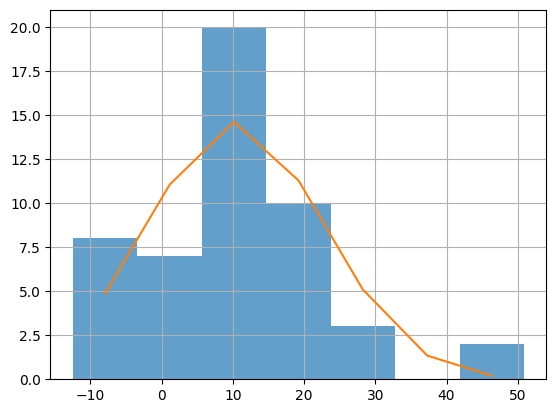

In [9]:
n = 50
R = max(d) - min(d)
ii = 7
h = R / ii
interv = [min(d) + i * h for i in range(ii + 1)]
interv = [(interv[i], interv[i + 1]) for i in range(ii)]
freq = []
for i in interv:
    v = 0
    for k in d:
        if (i[0] <= k < i[1]): v += 1
    freq.append(v)

x_i = [sum(i) / 2 for i in interv] # берем в качестве вариант середины интервалов
xi_ni = [i * k for i, k in zip(x_i, freq)]
xi2_ni = [i**2 * k for i, k in zip(x_i, freq)]

mean = sum(xi_ni) / n
var = sum(xi2_ni) / n - mean**2
std = np.sqrt(var)

zi = [(i - mean) / std for i in x_i]

def gauss(z):
    return np.exp(-z**2 / 2) / np.sqrt(2 * np.pi)

fz = [gauss(i) for i in zi]

ni = [h * n * i / std for i in fz]

plt.hist(d, bins=np.linspace(min(d), max(d), 8), alpha=0.7)
plt.plot(x_i, ni)
plt.grid()

In [10]:
k = ii - 2 - 1

xi2_empiric = sum([(i - k)**2 / k for i, k in zip(freq, ni)])
xi2_theor = 64.0011

In [11]:
print(xi2_empiric, xi2_theor)

23.36186272864378 64.0011


In [12]:
xi2_empiric

np.float64(23.36186272864378)

### Лабораторная работа 4

In [13]:
x = [0.62, 0.49, 1.74, 1.98, 1.36, 
     0.24, 1.17, 2.18, 0.91, 1.93, 
     1.53, 1.89, 1.51, 1.32, 0.4, 
     1.12, 0.5, 0.78, 1.7, 1.35, 
     1.28, 1.0, 0.81, 0.53, 0.51, 
     0.8, 2.98, 1.75, 0.15, 1.62,
     0.76, 0.33, 0.32, 1.12, 0.83, 
     0.53, 3.35, -0.27, 0.39, 2.06, 
     1.16, 1.67, 1.52, 0.78, -0.41, 
     0.59, 1.44, 1.34, 0.67, -0.2]


In [14]:
y = [-3.32, 7.94, -11.4, -6.1, -7.25, 0.62, -10.26, -18.13, 3.96, 
     -13.8, -3.99, -16.79, -9.78, -15.89, -0.76, -5.1, -12.53, 
     -1.63, -15.39, -10.45, -2.48, -0.8, -5.0, 1.93, 4.5, 4.02, 
     -27.58, -25.28, -4.95, -5.83, -3.19, 0.21, 7.12, -4.61, 0.94, 
     12.94, -27.55, 8.76, 2.08, -19.42, -1.14, -7.67, -7.99, -1.54, 
     14.21, 9.51, -1.27, -8.17, -1.58, 4.04]


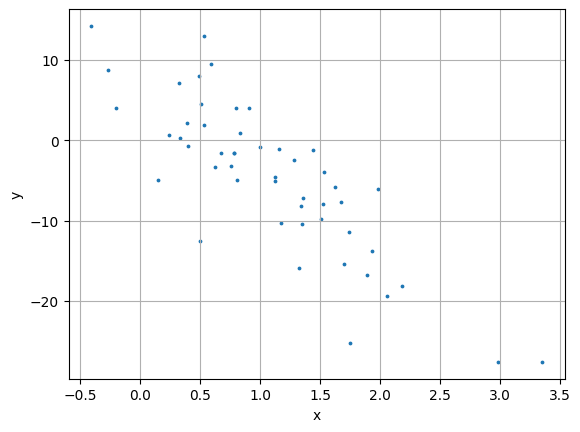

In [15]:
rx = max(x) - min(x)
ry = max(y) - min(y)
plt.scatter(x, y, s=3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [16]:
dx, dy = 0.5, 10
inter_x = [min(x)]
while (inter_x[-1] <= max(x)):
    inter_x.append(float(f'{inter_x[-1] + dx:.2f}'))
    
inter_y = [min(y)]
while (inter_y[-1] <= max(y)):
    inter_y.append(float(f'{inter_y[-1] + dy:.2f}'))

inter_x = [(inter_x[i], inter_x[i + 1]) for i in range(len(inter_x) - 1)]
inter_y = [(inter_y[i], inter_y[i + 1]) for i in range(len(inter_y) - 1)]

n = [[0 for _ in range(len(inter_x))] for _ in range(len(inter_y))]

for i in range(len(inter_x)):
    for k in range(len(inter_y)):
        f = 0
        for a, b in zip(x, y):
            if (inter_x[i][0] <= a < inter_x[i][1] and inter_y[k][0] <= b < inter_y[k][1]): f += 1
        n[k][i] = f

n_i_ = [sum(i) for i in n]
print(n_i_)
n_j_ = [sum([n[k][i] for k in range(len(inter_y))]) for i in range(len(inter_x))]
print(n_j_)

[5, 12, 23, 8, 2]
[3, 11, 11, 13, 9, 1, 1, 1]


In [17]:
n

[[0, 0, 0, 0, 2, 1, 1, 1],
 [0, 1, 0, 6, 5, 0, 0, 0],
 [0, 6, 8, 7, 2, 0, 0, 0],
 [2, 3, 3, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0]]

In [18]:
'grouped'

mid_x = [sum(i) for i in inter_x]
mid_y = [sum(i) for i in inter_y]

mean_x = sum([i * k for i, k in zip(mid_x, n_i_)]) / len(x)
mean_y = sum([i * k for i, k in zip(mid_y, n_j_)]) / len(y)

s_x = (sum([i**2 * k for i, k in zip(mid_x, n_i_)]) - len(x) * mean_x**2) / (len(x) - 1)
s_y = (sum([i**2 * k for i, k in zip(mid_y, n_j_)]) - len(y) * mean_y**2) / (len(y) - 1)

k_xy = 0

s = 0
for i in range(len(inter_x)):
    for k in range(len(inter_y)):
        s += (mid_x[i] - mean_x) * (mid_y[k] - mean_y) * n[k][i]

In [19]:
k_xy = s / (len(x) - 1)

In [20]:
k_xy

-29.6478693877551

In [21]:
'ungrouped'

umean_x = sum(x) / len(x)
umean_y = sum(y) / len(y)

us_x = sum([(i - umean_x)**2 for i in x]) / (len(x) - 1)
us_y = sum([(i - umean_y)**2 for i in y]) / (len(y) - 1)

uk_xy = 0

s = 0
for i in range(len(x)):
    s += (x[i] - umean_x) * (y[i] - umean_y)

uk_xy = s / (len(x) - 1)

In [22]:
rho_xy = k_xy / np.sqrt(s_x) / np.sqrt(s_y)
urho_xy = uk_xy / np.sqrt(us_x) / np.sqrt(us_y)

In [23]:
z = (urho_xy * np.sqrt(len(x) - 2)) / (np.sqrt(1 - urho_xy**2))
z

np.float64(-10.620087921186025)

In [24]:
alpha = 0.05

1 - alpha / 2

0.975

In [25]:
len(x) - 2

48

In [26]:
t = 2.3139 # ==> |z| < t - отклоняется

In [27]:
'fischer'

def arth(x):
    return 1 / 2 * np.log((1 + x) / (1 - x))

u = (arth(urho_xy) - arth(0)) / (1 / np.sqrt(len(x) - 3))

u

np.float64(-8.314970995897777)

In [28]:
sts.norm(0, 1).ppf(1 - alpha / 2) # отклоняется 

np.float64(1.959963984540054)

In [29]:
'interval estimation for correlation'

a = np.tanh(arth(urho_xy) - sts.norm(0, 1).ppf(1 - alpha / 2) / np.sqrt(len(x) - 3) - urho_xy / 2 / (len(x) - 1))
b = np.tanh(arth(urho_xy) + sts.norm(0, 1).ppf(1 - alpha / 2) / np.sqrt(len(x) - 3) - urho_xy / 2 / (len(x) - 1))
print(f'{a} < p < {b}')

-0.9033628270845454 < p < -0.7251523048837634


In [46]:
'Уравнение линейной регрессии y на x и x на y'

print('негруппированные')
print(f'y(x) = {umean_y - urho_xy * np.sqrt(us_y / us_x) * umean_x} + ({urho_xy * np.sqrt(us_y / us_x)})x')
print(f'x(y) = {umean_x - urho_xy * np.sqrt(us_x / us_y) * umean_y} + ({urho_xy * np.sqrt(us_x / us_y)})y')
print()
print('группированные')
print(f'y(x) = {mean_y - rho_xy * np.sqrt(s_y / s_x) * mean_x} + ({rho_xy * np.sqrt(s_y / s_x)})x')
print(f'x(y) = {mean_x - rho_xy * np.sqrt(s_y / s_x) * mean_y} + ({rho_xy * np.sqrt(s_x / s_y)})y')

негруппированные
y(x) = 6.74795115588283 + (-10.590015846926686)x
x(y) = 0.7701661196003897 + (-0.06623852620412361)y

группированные
y(x) = 47.490110608695645 + (-31.581426086956515)x
x(y) = 25.153436994782645 + (-0.053540252947377166)y


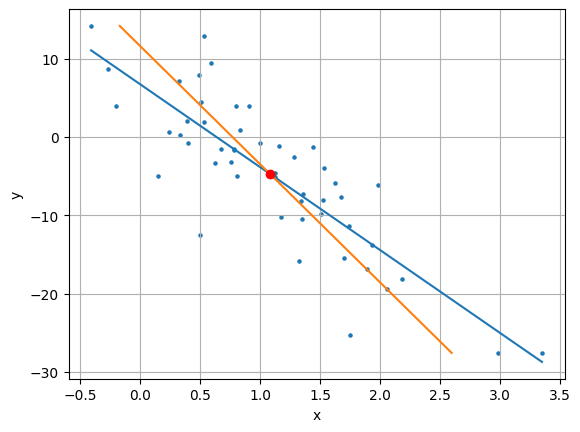

In [50]:
def lin_y(x):
    return 6.74795115588283 + (-10.590015846926686) * x

def lin_x(y):
    return 0.7701661196003897 + (-0.06623852620412361) * y
    
plt.scatter(x, y, s=5)
plt.plot(np.linspace(min(x), max(x), 1000), lin_y(np.linspace(min(x), max(x), 1000)))
plt.plot(lin_x(np.linspace(min(y), max(y), 1000)), np.linspace(min(y), max(y), 1000)) # np.linspace(min(y), max(y), 1000)
plt.plot(umean_x, umean_y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [42]:
max(y)

14.21